Xarray version: 2023.1.0
Matplotlib version: 3.6.3
Numpy version: 1.23.5


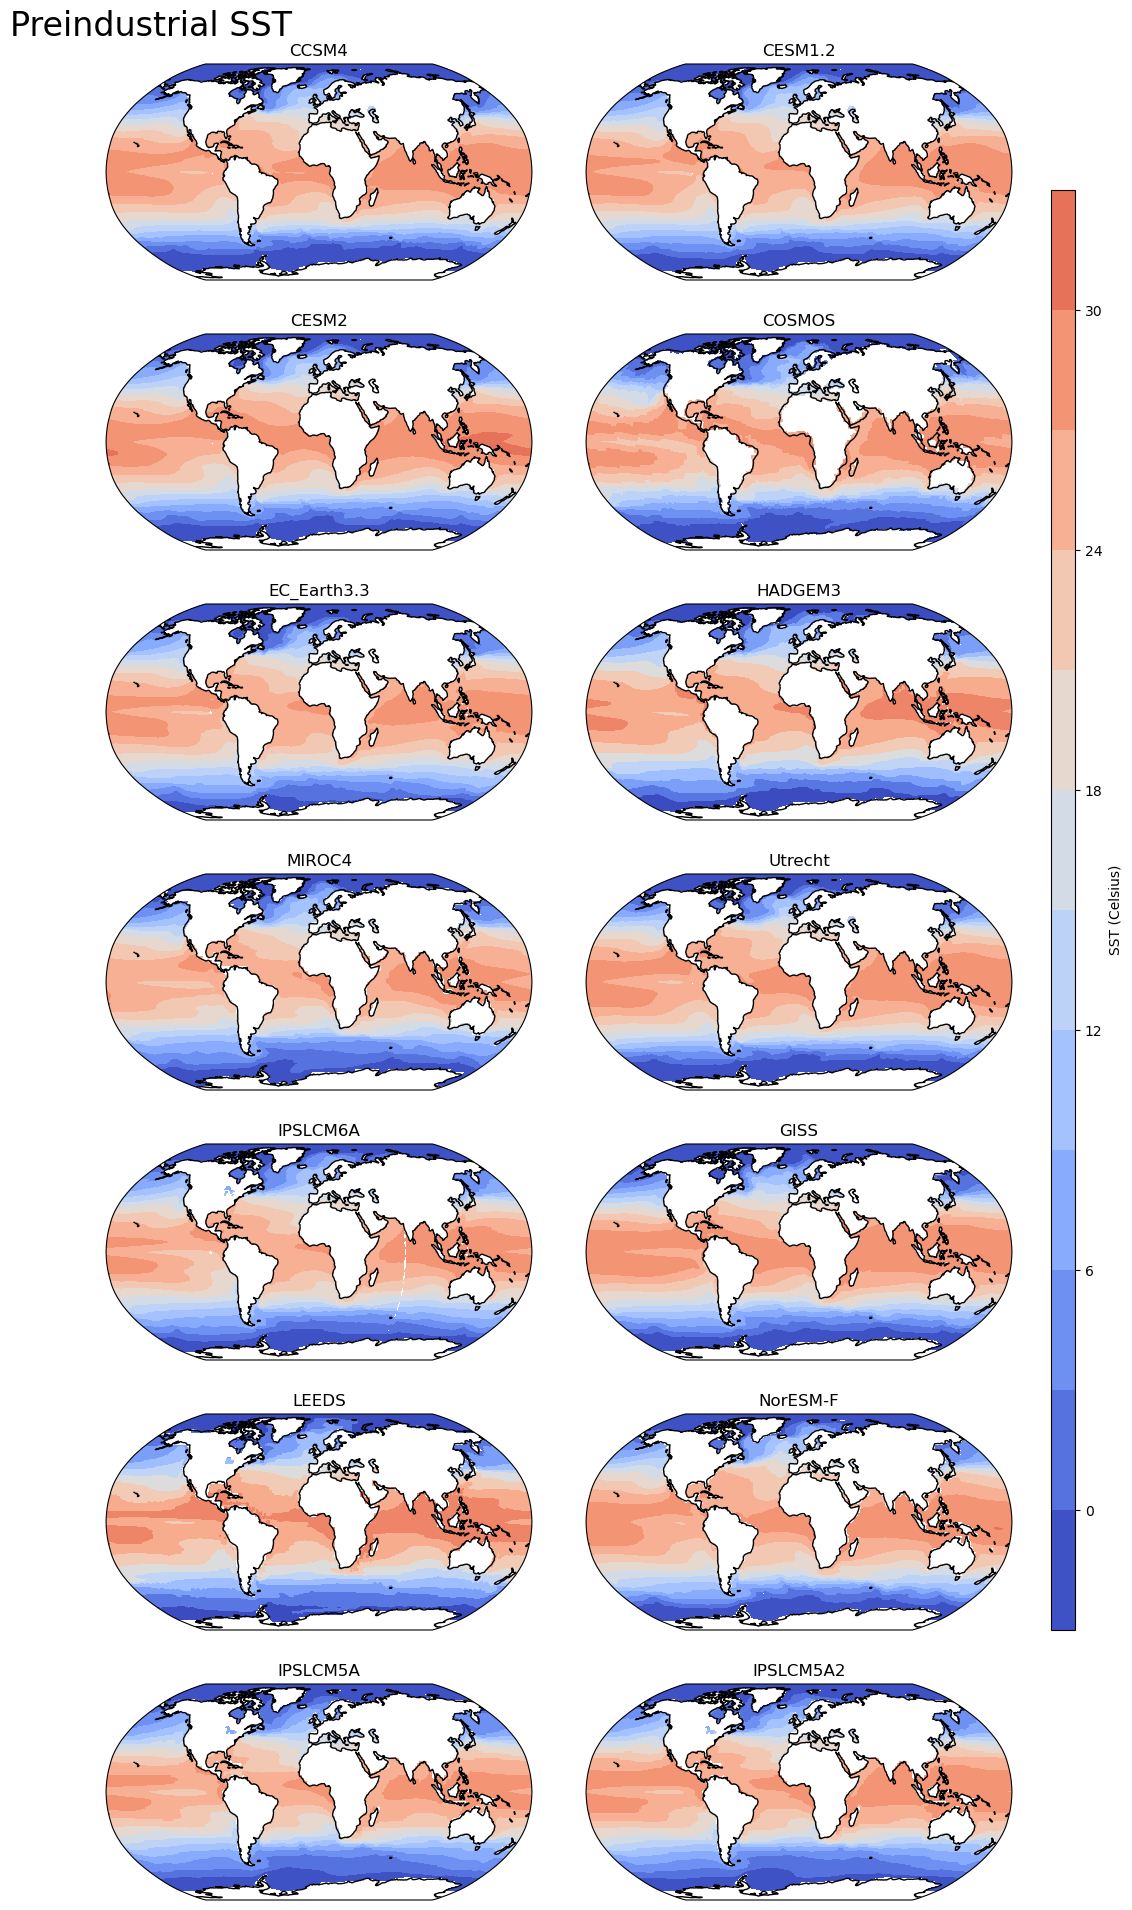

In [1]:
import os  # Module for operating system dependent functionality
import xarray as xr  # Module for working with labeled multidimensional arrays
import matplotlib as mpl  # Module for plotting
import matplotlib.pyplot as plt  # Module for creating plots
import matplotlib.colors as colors  # Module for working with colors in plots
import cartopy.crs as ccrs  # Module for coordinate reference systems
from cartopy.util import add_cyclic_point  # Function for adding cyclic points to data
import numpy as np  # Module for numerical computing
from matplotlib.colors import Normalize  # Class for normalizing colors in plots
import xesmf as xe  # For regridding data

# Print versions of Xarray, Matplotlib, and other relevant modules
print("Xarray version:", xr.__version__)
print("Matplotlib version:", mpl.__version__)
print("Numpy version:", np.__version__)

# Define the function to calculate horizontal temperature difference
def horizontal_difference(plio_ds, pi_ds): 
    """
    Calculate the horizontal temperature difference between Pliocene and Preindustrial datasets.

    Parameters:
    - plio_ds: Pliocene dataset containing temperature data.
    - pi_ds: Preindustrial dataset containing temperature data.

    Returns:
    - diff: Horizontal temperature difference between the two datasets.
    """
    # Calculate the temperature difference between Pliocene and Preindustrial datasets
    diff = plio_ds['TEMP'] - pi_ds['TEMP']
    return diff

def plot_projection(ax, X, Y, Z, title):
    """
    Plot data on a map projection.

    Parameters:
    - ax: A GeoAxesSubplot instance representing the subplot where the data will be plotted.
    - X: Longitude coordinates of the data.
    - Y: Latitude coordinates of the data.
    - Z: Data values to be plotted.
    - title: Title of the plot.

    Returns:
    - cs: Contour set for potential colorbar use.
    """
    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm') 
    norm = colors.Normalize(vmin=-2, vmax=38)  

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)  

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm) 

    # Add coastlines to the plot
    ax.coastlines()  

    # Set the title of the plot
    ax.set_title(title) 

    return cs 

# Define the directory path for slice files
path = '/glade/u/home/nwrye/OceanTemps_Compiles/Preprocessed Model Files/'

# List of file names to process for Pliocene (plio) and Preindustrial (pi) files respectively
pliofile_names = ['CCSM4_plio.nc', 'CESM1.2_plio.nc', 'CESM2_plio.nc', 'COSMOS_plio.nc',
                  'EC_Earth3.3_plio.nc', 'HADGEM3_NEW_1997_plio.nc', 'MIROC4_2004_plio.nc',
                  'Utrecht_CESM1.0.5_plio.nc', 'IPSLCM6A_LR_plio.nc', 'GISS_plio.nc',
                  'LEEDS_plio.nc', 'NorESM-F_plio.nc', 'IPSLCM5A_plio.nc', 'IPSLCM5A2_plio.nc']

pifile_names = ['CCSM4_pi.nc', 'CESM1.2_pi.nc', 'CESM2_pi.nc', 'COSMOS_pi.nc', 'EC_Earth3.3_pi.nc',
                'HADGEM3_NEW_1997_pi.nc', 'MIROC4_2004_pi.nc', 'Utrecht_CESM1.0.5_pi.nc',
                'IPSLCM6A_LR_pi.nc', 'GISS_pi.nc', 'LEEDS_pi.nc', 'NorESM-F_pi.nc', 'IPSLCM5A_pi.nc',
                'IPSLCM5A2_pi.nc']

# Create empty lists to store sliced datasets for Pliocene and Preindustrial files
pisds = []  
pliosds = []  

# Loop over Pliocene file names
for fname in pliofile_names:
    # Open Pliocene dataset and append it to the list
    pliods = xr.open_dataset(os.path.join(path, fname))
    pliosds.append(pliods)
    
# Loop over Preindustrial file names
for fname in pifile_names:
    # Open Preindustrial dataset and append it to the list
    pids = xr.open_dataset(os.path.join(path, fname))
    pisds.append(pids)

model_names = ['CCSM4', 'CESM1.2', 'CESM2', 'COSMOS', 'EC_Earth3.3', 'HADGEM3', 'MIROC4', 'Utrecht',
               'IPSLCM6A', 'GISS', 'LEEDS', 'NorESM-F', 'IPSLCM5A', 'IPSLCM5A2']

# Create a 7x2 grid for Preindustrial datasets with a Robinson projection
fig, axs = plt.subplots(7, 2, figsize=(12, 18), subplot_kw={'projection': ccrs.Robinson()})
fig.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)  # Adjust the spacing and top margin

# Overall title for the entire figure
fig.suptitle('Preindustrial SST', fontsize=24, y=1., x=0.05)  # Set the title position

# Iterate over Preindustrial datasets and corresponding model names
for i, (pids, model_name) in enumerate(zip(pisds[:14], model_names[:14])):
    # Determine the subplot position in the 7x2 grid
    row, col = divmod(i, 2)

    # Create a subplot and set the position
    ax = axs[row, col]

    # Set the position for non-empty subplot
    ax.set_position([col * 0.4, 1 - (row + 1) * 0.15, 0.38, 0.12])

    # Call the modified plot_projection function
    cs = plot_projection(ax, pids['lon'], pids['lat'], pids['TEMP'][0, :, :], title=model_name)

# Add a vertical colorbar on the right side of the subplots
cbar_ax = fig.add_axes([0.8, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', label='SST (Celsius)')

# Setting output path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/Plot Images/'

# Save the figure
#fig.savefig(path + 'preindustrial_sst_figure.pdf', bbox_inches='tight')

# Show the plot
plt.show()